# Regularización para regresión y clasificación

## Regresión regularizada
Para ilustrar la regularización usando Ridge y Lasso, vamos a ajustar estos algoritmos a los datos del fichero `datos_regularizacion.csv` disponible en el aula virtual.

Cargad los datos en un dataframe llamado `datos`.


In [1]:
# Completar aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

DATA_DIRECTORY = path.join('..', 'data')
datos = pd.read_csv(
    path.join(DATA_DIRECTORY,  'datos_regularizacion.csv'),
    sep=','
)
# --------------------
datos

,x,y
0,-0.031161,1.532027
1,0.032386,0.758267
2,0.122271,1.048393
3,0.230400,1.066580
4,0.242299,1.373395
5,0.318407,-1.144595
6,0.367820,-1.241243
7,0.428989,-1.652124
8,0.474160,-1.085733
9,0.538686,0.077627


Llevad a cabo la representación gráfica del conjunto

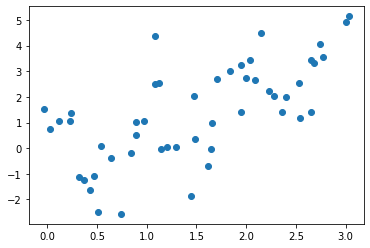

In [188]:
# Completar aquí
fig, ax = plt.subplots()
ax.scatter(datos['x'], datos['y'])
# --------------------


Ajustad una regresión lineal usando términos polinomiales de hasta grado 10. Después de incluir las características correspondientes a los términos de grado 10, llevad a cabo la estanderización de las características. 
Representad la curva ajustada en la gráfica anterior.

<class 'numpy.ndarray'>


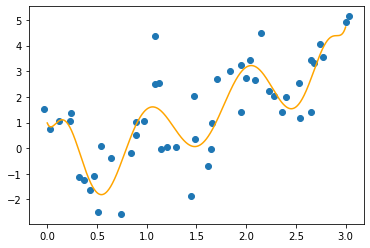

In [3]:
# Completar aquí
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

procesadoLinear = Pipeline(
    [
        ('transform', PolynomialFeatures(degree = 10, include_bias= False)), 
        ('estand', StandardScaler()),
        ('regresion',LinearRegression())
    ]
)

X = datos['x'].values.reshape(-1,1)
y = datos['y'].values

X_reg = np.linspace(0.0,3.0,1000)

linear = procesadoLinear.fit(X,y)



y_pred = linear.predict(X_reg.reshape(-1,1))

# --------------------
fig, ax = plt.subplots()
ax.scatter(datos['x'], datos['y'])
ax.plot(X_reg, y_pred, color = 'orange');
print(type(X))

## Ajuste de una Ridge regression con `alpha=1`
Usando la clase `Ridge` del submódulo `linear_model`, aplicad a los datos una regresión ridge con `alpha=1` usando, al igual que en el apartado anterior, términos polinomiales de grado 10.


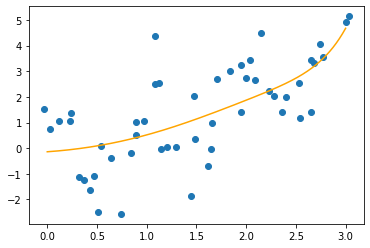

In [190]:
# Completar aquí
from sklearn.linear_model import Ridge

procesadoRidge = Pipeline(
    [
        ('transform', PolynomialFeatures(degree = 10, include_bias= False)), 
        ('estand', StandardScaler()),
        ('regresion',Ridge(alpha = 1))
    ]
)

ridge = procesadoRidge.fit(X,y)

y_pred = ridge.predict(X_reg.reshape(-1,1))

# --------------------
fig, ax = plt.subplots()
ax.scatter(datos['x'], datos['y'])
ax.plot(X_reg, y_pred, color = 'orange');

## Variamos `alpha` 
Representad los ajustes correspondientes a `alpha=0`, `alpha=0.00001`, `alpha=1` en la misma gráfica.
> Consejo: podéis usar un bucle sobre los valores de `alpha`, usando el método `set_params` que se puede aplicar a un estimador para cambiar algunos de sus parámetros (en este caso `alpha`)

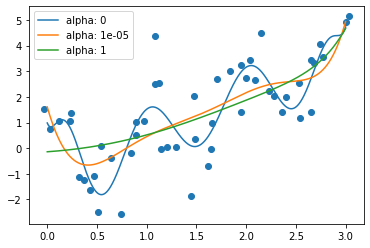

In [191]:
# Completar aquí
alphas = [0, 0.00001, 1]

fig, ax = plt.subplots()
ax.scatter(datos['x'], datos['y'])

for i in alphas:
    procesadoRidge['regresion'].set_params(alpha = i)
    ridge = procesadoRidge.fit(X,y)
    y_pred = ridge.predict(X_reg.reshape(-1,1))
    ax.plot(X_reg, y_pred, label = f'alpha: {i}')
# --------------------
ax.legend();

# Clasificación regularizada: ejemplo con el conjunto MNIST
MNIST es un conjunto de datos muy clásico en machine learning que consiste en imágenes de dígitos escritos a mano en sobres. Las imágenes tienen una resolución de 28 por 28 píxeles, por lo que cada imagen tiene 784 características, cada característica corresponde a la intensidad de gris del pixel correspondiente, va desde 0 (blanco) a 255 (negro).

MNIST está disponible para descargar desde `sklearn`, pero vamos a cargar una versión reducida con 10000 imágenes, el fichero se llama `mnist_784.10000.csv` y está disponible en el aula virtual. Usad el parámetro `dtype` en `read_csv` para especificar que la columna `y` es de tipo `str`.

In [192]:
# Completar aquí: cargar los datos en un conjunto mnist
mnist = pd.read_csv(
    path.join(DATA_DIRECTORY,  'mnist_784_10000.csv'),
    sep=',',
    dtype = {'y': str}
)
# --------------------
mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


Crear la `Series` `y` el `DataFrame` `X` 

In [193]:
# Completar aquí
X = mnist.drop(columns = ['y'])
y = mnist['y']
# --------------------
print(f'Tamaño de X: {X.shape}, tamaño de y {y.shape}')

Tamaño de X: (10000, 784), tamaño de y (10000,)


Si queréis trabajar con el conjunto completo, se puede descargar directamente desde `sklearn`, tened en cuenta que los tiempos de ejecución son más largos.

In [1]:
# Si queréis trabajar con el conjunto completo:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
# # el resultado es un diccionario, dos claves importantes son data y target
X, y = mnist['data'], mnist['target']
print(f'Tamaño de X: {X.shape}, tamaño de y {y.shape}')

<class 'pandas.core.frame.DataFrame'>
Tamaño de X: (70000, 784), tamaño de y (70000,)


Podemos visualizar una de las imágenes:

Etiqueta: 8


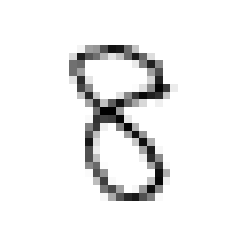

In [195]:
# nada que completar
from matplotlib import cm
fig, ax = plt.subplots()
imagen = X.iloc[3600,:].values.reshape(28, 28)
ax.imshow(
    imagen,
    cmap=cm.binary,
    interpolation='nearest'
)
ax.axis('off');
print(f'Etiqueta: {y.iloc[3600]}')

Representamos 10 imágenes escogidas al azar de cada etiqueta:

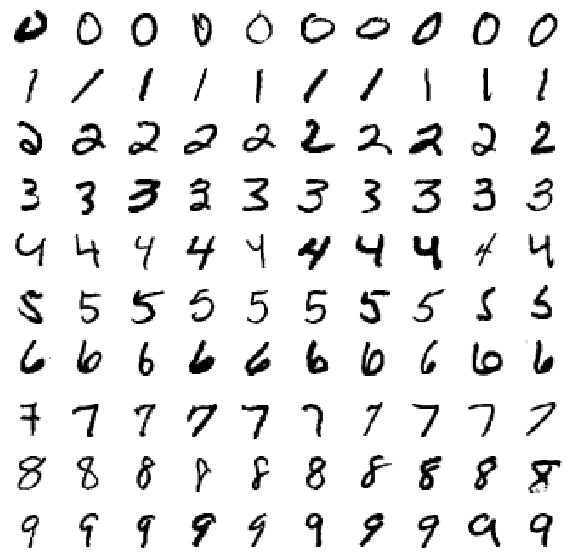

In [196]:
# Nada que completar
from numpy.random import default_rng
rng = default_rng(314)
fig, axes= plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    indexes = rng.choice(X[y==str(i)].index, replace=False,size=10)
    for j in range(10):
        imagen = X.loc[indexes[j],:].values.reshape(28, 28)
        axes[i, j].imshow(
            imagen,
            cmap=cm.binary,
            interpolation='nearest'
        )
        axes[i , j].axis('off');

## Separación conjunto de aprendizaje, conjunto de test
Lo primero que vamos a hacer es apartar un subconjunto de test.  Vamos a usar para ello `StratifiedShuffleSplit` del submódulo `model_selection`, que hace una separación (split) aleatoria, pero de manera que las dos partes generadas contengan proporciones parecidas de los valores de `y`. 

In [197]:
from sklearn.model_selection import StratifiedShuffleSplit
# Empezamos por crear el objeto que realizará el split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=314)
for train_index, test_index in split.split(X, y):
    X_train, y_train = X.loc[train_index].values, y.loc[train_index].values
    X_test, y_test = X.loc[test_index].values, y.loc[test_index].values

Comprobad que se ha respetado la proporción de las etiquetas tanto en el conjunto train como en el conjunto test.

In [198]:
# Completar aquí
print('y_train')
print(pd.Series(y_train).value_counts(normalize= True))
print('---------------')
print('y_test')
print(pd.Series(y_test).value_counts(normalize= True))
# --------------------


y_train
1    0.112536
7    0.104179
3    0.102018
2    0.099857
9    0.099393
0    0.098625
6    0.098232
8    0.097500
4    0.097482
5    0.090179
dtype: float64
---------------
y_test
1    0.112500
7    0.104214
3    0.102000
2    0.099857
9    0.099429
0    0.098571
6    0.098214
4    0.097500
8    0.097500
5    0.090214
dtype: float64


## Aplicación de la regresión logística con penalización l2
> No se trata de un problema de clasificación binario sino multiclases (10). El algoritmo `LogisticRegression` aplica automáticamente la estrategia de "One Versus all"

Siguiendo lo realizado en la práctica anterior, realizad sobre el conjunto de aprendizaje la predicción con penalización l2, usando el defecto de `C=1`, a través de validación cruzada. Antes de aplicar la regresión logística, estanderizad las características.
Guardad el resultado de las predicciones en `y_train_pred`.

In [199]:
# Completar aquí

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

procesadoConPenalizacion = Pipeline(
    [
        ('estand', StandardScaler()),
        ('regresion', LogisticRegression(penalty = 'l2', max_iter = 2000))
    ]
)

y_train_pred = cross_val_predict(procesadoConPenalizacion, X_train, y_train, cv = 5)

# --------------------
y_train_pred[:15]

array(['6', '8', '4', '8', '6', '0', '3', '1', '0', '9', '5', '5', '0',
       '1', '7'], dtype=object)

Construid la matriz de confusión y asignadla a un objeto llamado `matriz_confusion`.

In [200]:
# Completar aquí
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(y_train, y_train_pred)
# --------------------
matriz_confusion

array([[5276,    1,   33,   11,   15,   65,   55,   16,   41,   10],
       [   1, 6113,   41,   22,    8,   18,    6,   21,   61,   11],
       [  47,   69, 4951,  113,   64,   30,   84,   76,  138,   20],
       [  24,   23,  157, 5046,   20,  186,   16,   60,  117,   64],
       [  22,   32,   48,    9, 4996,   14,   52,   43,   38,  205],
       [  58,   28,   42,  167,   58, 4370,  104,   27,  146,   50],
       [  41,   15,   67,    6,   54,   88, 5188,    7,   32,    3],
       [  13,   35,   71,   33,   66,   13,    3, 5385,   20,  195],
       [  45,   96,   86,  151,   29,  158,   49,   26, 4735,   85],
       [  27,   23,   12,   70,  172,   42,    3,  194,   49, 4974]],
      dtype=int64)

Obtened la tasa de acierto del algoritmo. Para ello, podeís usar `numpy.trace` para obtener la traza de una matriz y por otra parte, compararlo con el resultado del método `accuracy_score` del súbmodulo `metrics`.

In [201]:
# Completar aquí
from sklearn.metrics import accuracy_score

t = np.trace(matriz_confusion) / X_train.shape[0]

a = accuracy_score(y_train, y_train_pred)

print(f'La tasa de acierto calculada a partir de la traza es {t}')
print(f'La misma tasa calculada usando el método accuracy_score es {a}')


La tasa de acierto calculada a partir de la traza es 0.9113214285714286
La misma tasa calculada usando el método accuracy_score es 0.9113214285714286


Vamos a calcular ahora la precisión. Al tratarse de un clasificación multiclase, lo que calculamos es la precisión para cada clase y hacemos el promedio de los 10 valores obtenidos.
Usando la matriz de confusión, calculad la precisión para cada clase (de 0 a 9). 
> Consejo: podéis usar `np.divide` para hacer la división de dos arrays, elemento a elemento

In [202]:
# Completar aquí
pre_col = np.divide(matriz_confusion.diagonal(), matriz_confusion.sum(axis = 0)).mean()
# --------------------


Calculad la precision promedio sobre clases.


In [203]:
# Completar aquí
print(f'La precisión promedio sobre las clases es {pre_col}')


La precisión promedio sobre las clases es 0.9102470890531424


Repetid estos cálculos para conseguir la sensibilidad promedio sobre clases

In [204]:
# Completar aquí
sen_col = np.divide(matriz_confusion.diagonal(), matriz_confusion.sum(axis = 1)).mean()
print(f'La sensibilidad promedio sobre las clases es {sen_col}')


La sensibilidad promedio sobre las clases es 0.910143530207162


En realidad, podríamos haber calculado directamente estos valores promedios usando `precision_score` y `recall_score` del submódulo `metrics`, con el parámetro `average="macro"`

In [205]:
# Completar aquí
from sklearn.metrics import precision_score, recall_score
puntuacion_precision = precision_score(y_true = y_train, y_pred = y_train_pred, average = 'macro')
puntuacion_recall = recall_score(y_true = y_train, y_pred = y_train_pred, average = 'macro')

# --------------------
print(f'Usando precision_score, la precisión promedio sobre clases es {puntuacion_precision}')
print(f'Usando recall_score, la sensibilidad promedio sobre clases es {puntuacion_recall}')
# --------------------


Usando precision_score, la precisión promedio sobre clases es 0.9102470890531424
Usando recall_score, la sensibilidad promedio sobre clases es 0.910143530207162


Calculad la precisión y la sensibilidad promedio que obtenemos aplicando sobre el conjunto de test el modelo entrenado con el conjunto de aprendizaje.

In [206]:
# Completar aquí
procesadoConPenalizacion.fit(X_train, y_train)
y_pred = procesadoConPenalizacion.predict(X_test)

puntuacion_precision = precision_score(y_true = y_test, y_pred = y_pred, average = 'macro')
puntuacion_recall = recall_score(y_true = y_test, y_pred = y_pred, average = 'macro')

# --------------------
print(f'Usando precision_score, la precisión promedio sobre clases es {puntuacion_precision}')
print(f'Usando recall_score, la sensibilidad promedio sobre clases es {puntuacion_recall}')
# --------------------


Usando precision_score, la precisión promedio sobre clases es 0.9140575098497953
Usando recall_score, la sensibilidad promedio sobre clases es 0.9138872838915942


## Búsqueda del mejor valor de `C` para la regresión logística regularizada.
Usad `GridSearchCV` para decidir qué valor de `C` fijar entre las siguientes posibilidades:
0.005, 0.01, 0.05, 0.1, 1.
> Recordad que para el problema de clasificación, el parámetro `scoring` debe tomar el valor 'accuracy'.

In [207]:
# Completar aquí
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator = procesadoConPenalizacion,
    param_grid = {
        'regresion__C': [0.005, 0.01, 0.05, 0.1, 1],
    },
    cv = 5,
    scoring = 'accuracy'
)

grid_search.fit(X_train, y_train)
# --------------------
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estand', StandardScaler()),
                                       ('regresion',
                                        LogisticRegression(max_iter=2000))]),
             param_grid={'regresion__C': [0.005, 0.01, 0.05, 0.1, 1]},
             scoring='accuracy')

Cuál es el valor de `C` que corresponde al mejor modelo? Corresponde a más o menos regularización que la opción por defecto de `LogisticRegression`?

Calculad, para el mejor modelo, la precisión promedio y la sensibilidad promedio sobre las clases, usando para empezar el conjunto de aprendizaje y a continuación el conjunto de test


In [208]:
# Completar aquí
grid_search.best_estimator_.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_train)

puntuacion_precision = precision_score(y_true = y_train, y_pred = y_pred, average = 'macro')
puntuacion_recall = recall_score(y_true = y_train, y_pred = y_pred, average = 'macro')

print('---------------------------------------------------------')
print('Para el conjunto de aprendizaje, usando el mejor modelo:')
print(f'Usando precision_score, la precisión promedio sobre clases es {puntuacion_precision}')
print(f'Usando recall_score, la sensibilidad promedio sobre clases es {puntuacion_recall}')

y_pred = grid_search.best_estimator_.predict(X_test)

puntuacion_precision = precision_score(y_true = y_test, y_pred = y_pred, average = 'macro')
puntuacion_recall = recall_score(y_true = y_test, y_pred = y_pred, average = 'macro')

# --------------------
print('---------------------------------------------------------')
print('Para el conjunto de test, usando el mejor modelo:')
print(f'Usando precision_score, la precisión promedio sobre clases es {puntuacion_precision}')
print(f'Usando recall_score, la sensibilidad promedio sobre clases es {puntuacion_recall}')
print('---------------------------------------------------------')

---------------------------------------------------------
Para el conjunto de aprendizaje, usando el mejor modelo:
Usando precision_score, la precisión promedio sobre clases es 0.935731387765457
Usando recall_score, la sensibilidad promedio sobre clases es 0.9355840504560703
---------------------------------------------------------
Para el conjunto de test, usando el mejor modelo:
Usando precision_score, la precisión promedio sobre clases es 0.9233450306996612
Usando recall_score, la sensibilidad promedio sobre clases es 0.9231177973345771
---------------------------------------------------------
